# Introduction to RDKit

``````{admonition} Overview
:class: overview

Questions:

* What is RDKit?

* How can I get molecule information in Python?

* What is a molecular descriptor?

Objectives:

* Use RDKit to create molecules in Python

``````

There are also libraries in Python that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called RDKit.

RDKit lets us create variables which represent molecules and retrieve information about the molecules. 

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to import it. 

In [2]:
from rdkit import Chem

## Creating Molecules with RDKit

To get information about molecules in RDKit, we have to first create variables representing molecules. RDKit has molecule object that can be used to retrieve information or calculate properties. First, the molecule name has to be communicated to RDKit in a way that computers understand. 

### Creating molecules using strings - SMILES

We are going to use a format called [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system). SMILES stands for "Simplified Molecular-Input Line-entry System" and is a string representation of a molecule. You usually will be looking up SMILES or having a program generate them for you. We could also open info from molecular file formats like `mol`.

In SMILES, if we want methane, we specify that with "C". We can create a representation of methane using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [3]:
methane = Chem.MolFromSmiles("C")

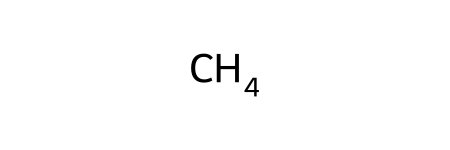

In [4]:
methane

You can see more information on this [Guide to SMILES](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html). 
Usually, you will be able to look up the SMILES strings for your molecule of interest using something like [PubChem](https://pubchem.ncbi.nlm.nih.gov/), although you can also write SMILES by hand.

``````{admonition} Check Your Understanding
:class: exercise

Create RDKit molecules for the following molecules:

1. Propane

2. Ethene

3. Cyclohexane

4. A molecule of your choice.

``````

## Creating More Complicated Molecules

We can look up SMILES of our molecules of choice on websites like [PubChem](https://pubchem.ncbi.nlm.nih.gov/). 
See the examples below for [phenylalanine](https://pubchem.ncbi.nlm.nih.gov/compound/6140#section=Canonical-SMILES) and 
[benzene](https://pubchem.ncbi.nlm.nih.gov/compound/241#section=Canonical-SMILES).

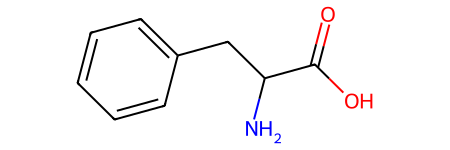

In [5]:
# this phenylalanine uses canonical smiles (no stereochemistry information)
phenylalanine = Chem.MolFromSmiles("C1=CC=C(C=C1)CC(C(=O)O)N")
phenylalanine

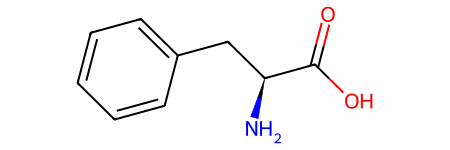

In [6]:
# phenyalanine using isomeric smiles
l_phenylalanine = Chem.MolFromSmiles("C1=CC=C(C=C1)C[C@@H](C(=O)O)N")
l_phenylalanine

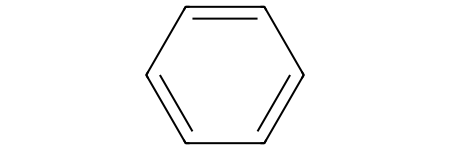

In [7]:
benzene = Chem.MolFromSmiles("c1ccccc1")
benzene

## Working with Molecules

RDKit will allow us to access information about our molecule. For example, we can have RDKit tell us the number of atoms in our molecule.

In [8]:
num_methane = methane.GetNumAtoms()
print(f"The number of atoms in methane is {num_methane}")

The number of atoms in methane is 1


This isn't exactly what we expect. By default, RDKit only counts "heavy atoms". This means that hydrogen isn't included. We can tell RDKit to count hydrogens by adding `onlyExplicit=False` to our `GetNumAtoms` function.

In [9]:
num_methane_h = methane.GetNumAtoms(onlyExplicit=False)
print(f"The number of atoms in methane including hydrogens is {num_methane_h}.")

The number of atoms in methane including hydrogens is 5.


We can also get information about atoms or  bonds from RDKit molecules. We can use the `GetAtoms()` function, then use a loop to look at the atoms.

In [10]:
ethanol = Chem.MolFromSmiles("CCO")

for atom in ethanol.GetAtoms():
    print(atom.GetSymbol(), atom.GetMass())

C 12.011
C 12.011
O 15.999


Like the previous example, the molecule does not have hydrogens by default.
If you need to work with the hydrogens, you can use a function to add them.
Now, when we look through the atoms, we get the hydrogens as well.

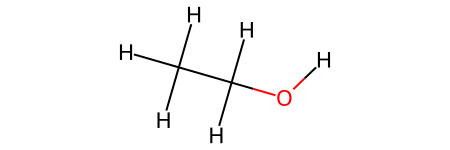

In [11]:
ethanol_h = Chem.AddHs(ethanol)

ethanol_h

In [12]:
for atom in ethanol_h.GetAtoms():
    print(atom.GetSymbol())

C
C
O
H
H
H
H
H
H


Similarly, you can use the `GetBonds` method to get the bonds in a molecule.

In [13]:
for bond in ethanol.GetBonds():
    print(bond.GetBondType())

SINGLE
SINGLE


You can see the methods available on atoms and bonds by using the `dir` method in Python. 
The `dir` method is built-in and will tell you what attributes and methods are available on an object.

Note that the `atom` and `bond` variables used in the code blocks below are from our previous `for` loops.

In [14]:
dir(atom)

['ClearProp',
 'DescribeQuery',
 'GetAtomMapNum',
 'GetAtomicNum',
 'GetBonds',
 'GetBoolProp',
 'GetChiralTag',
 'GetDegree',
 'GetDoubleProp',
 'GetExplicitBitVectProp',
 'GetExplicitValence',
 'GetFormalCharge',
 'GetHybridization',
 'GetIdx',
 'GetImplicitValence',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsotope',
 'GetMass',
 'GetMonomerInfo',
 'GetNeighbors',
 'GetNoImplicit',
 'GetNumExplicitHs',
 'GetNumImplicitHs',
 'GetNumRadicalElectrons',
 'GetOwningMol',
 'GetPDBResidueInfo',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetQueryType',
 'GetSmarts',
 'GetSymbol',
 'GetTotalDegree',
 'GetTotalNumHs',
 'GetTotalValence',
 'GetUnsignedProp',
 'HasOwningMol',
 'HasProp',
 'HasQuery',
 'InvertChirality',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'NeedsUpdatePropertyCache',
 'SetAtomMapNum',
 'SetAtomicNum',
 'SetBoolProp',
 'SetChiralTag',
 'SetDoubleProp',
 'SetExplicitBitVectProp',
 'SetFormalCharge',
 'SetHybridization',
 'SetIntProp',
 'SetIsAromatic',
 'SetIsotope',
 'Set

In [15]:
dir(bond)

['ClearProp',
 'DescribeQuery',
 'GetBeginAtom',
 'GetBeginAtomIdx',
 'GetBondDir',
 'GetBondType',
 'GetBondTypeAsDouble',
 'GetBoolProp',
 'GetDoubleProp',
 'GetEndAtom',
 'GetEndAtomIdx',
 'GetIdx',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsConjugated',
 'GetOtherAtom',
 'GetOtherAtomIdx',
 'GetOwningMol',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetSmarts',
 'GetStereo',
 'GetStereoAtoms',
 'GetUnsignedProp',
 'GetValenceContrib',
 'HasOwningMol',
 'HasProp',
 'HasQuery',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'SetBondDir',
 'SetBondType',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetIsAromatic',
 'SetIsConjugated',
 'SetProp',
 'SetStereo',
 'SetStereoAtoms',
 'SetUnsignedProp',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex

## Molecular Descriptors

Molecular descriptors are properties of molecules which can be analyzed using statistical methods to make predictions about molecular properties. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html).
RDKit has a module which can be used to retrieve and calculate molecular descriptors.

To get molecular descriptors from RDKit, we import the `Descriptors` module.

In [16]:
from rdkit.Chem import Descriptors

Some molecular descriptors we might be interested in are:

1. Heavy Atom Count (`HeavyAtomCount`)
2. Number of hydrogen bond acceptrs (`NumHAcceptors`)
3. Number of hydrogen bond donors (`NumHDonors`)
4. Number of valence electrons (`NumValenceElectrons`)
5. Molecular weight (`MolWt`)
6. Number of aromatic rings (`NumAromaticRings`)
And many others!

To get the descritpor you're interested in, the syntax is

```python
Descriptors.DescriptorName(molecule_variable)
```

In [17]:
print("Printing info for benzene:")
print(f"The molecular weight is {Descriptors.MolWt(benzene)}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings(benzene)}")


Printing info for benzene:
The molecular weight is 78.11399999999999
The number of aromatic rings is 1


## Stereochemistry

In [18]:
# Can tell us how many stereocenters
Chem.rdMolDescriptors.CalcNumAtomStereoCenters(phenylalanine)

1

In [22]:
# Can tell us the atom number and the orientation
print(Chem.FindMolChiralCenters(phenylalanine, includeUnassigned=True))
print(Chem.FindMolChiralCenters(l_phenylalanine, includeUnassigned=True))

[(7, '?')]
[(7, 'S')]


In [23]:
# Can generate stereoisomers
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

stereo = list(EnumerateStereoisomers(phenylalanine))

print(f"Generated {len(stereo)} stereoisomers.")

Generated 2 stereoisomers.


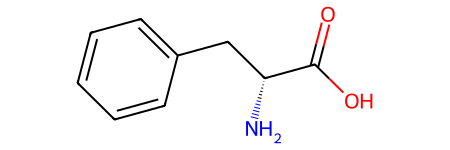

In [24]:
stereo[0]

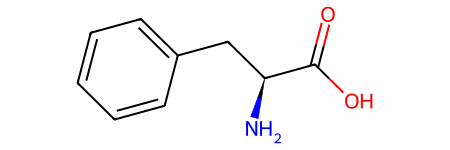

In [25]:
stereo[1]

## Substructure Search

RDKit can do a lot that is beyond the scope of this workshop, including calculating molecular fingerprints, similarity scores, and chemical reactions. 
One thing you can do are substructure searches. You can identify when molecules contain other molecules. Let's try this with benzene and phenylalanine.

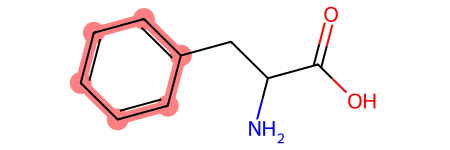

In [26]:
matches = phenylalanine.GetSubstructMatches(benzene)
phenylalanine

The returned value is a tuple of atom indices which represent the match(es) found.

In [27]:
matches

((0, 1, 2, 3, 4, 5),)

``````{admonition} Exercise
:class: exercise

Buckminsterfullerene, with chemical formula C60, is made up entirely of five membered and six-membered rings.

For this exercise, you should

1. Create a molecule representing buckminsterfullerene (Find the SMILES on PubChem).

2. Perform a substructure search to find the number of benzenes in the molecule.

3. Calculate the number of aromatic bonds.

``````